In [1]:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
import numpy
# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

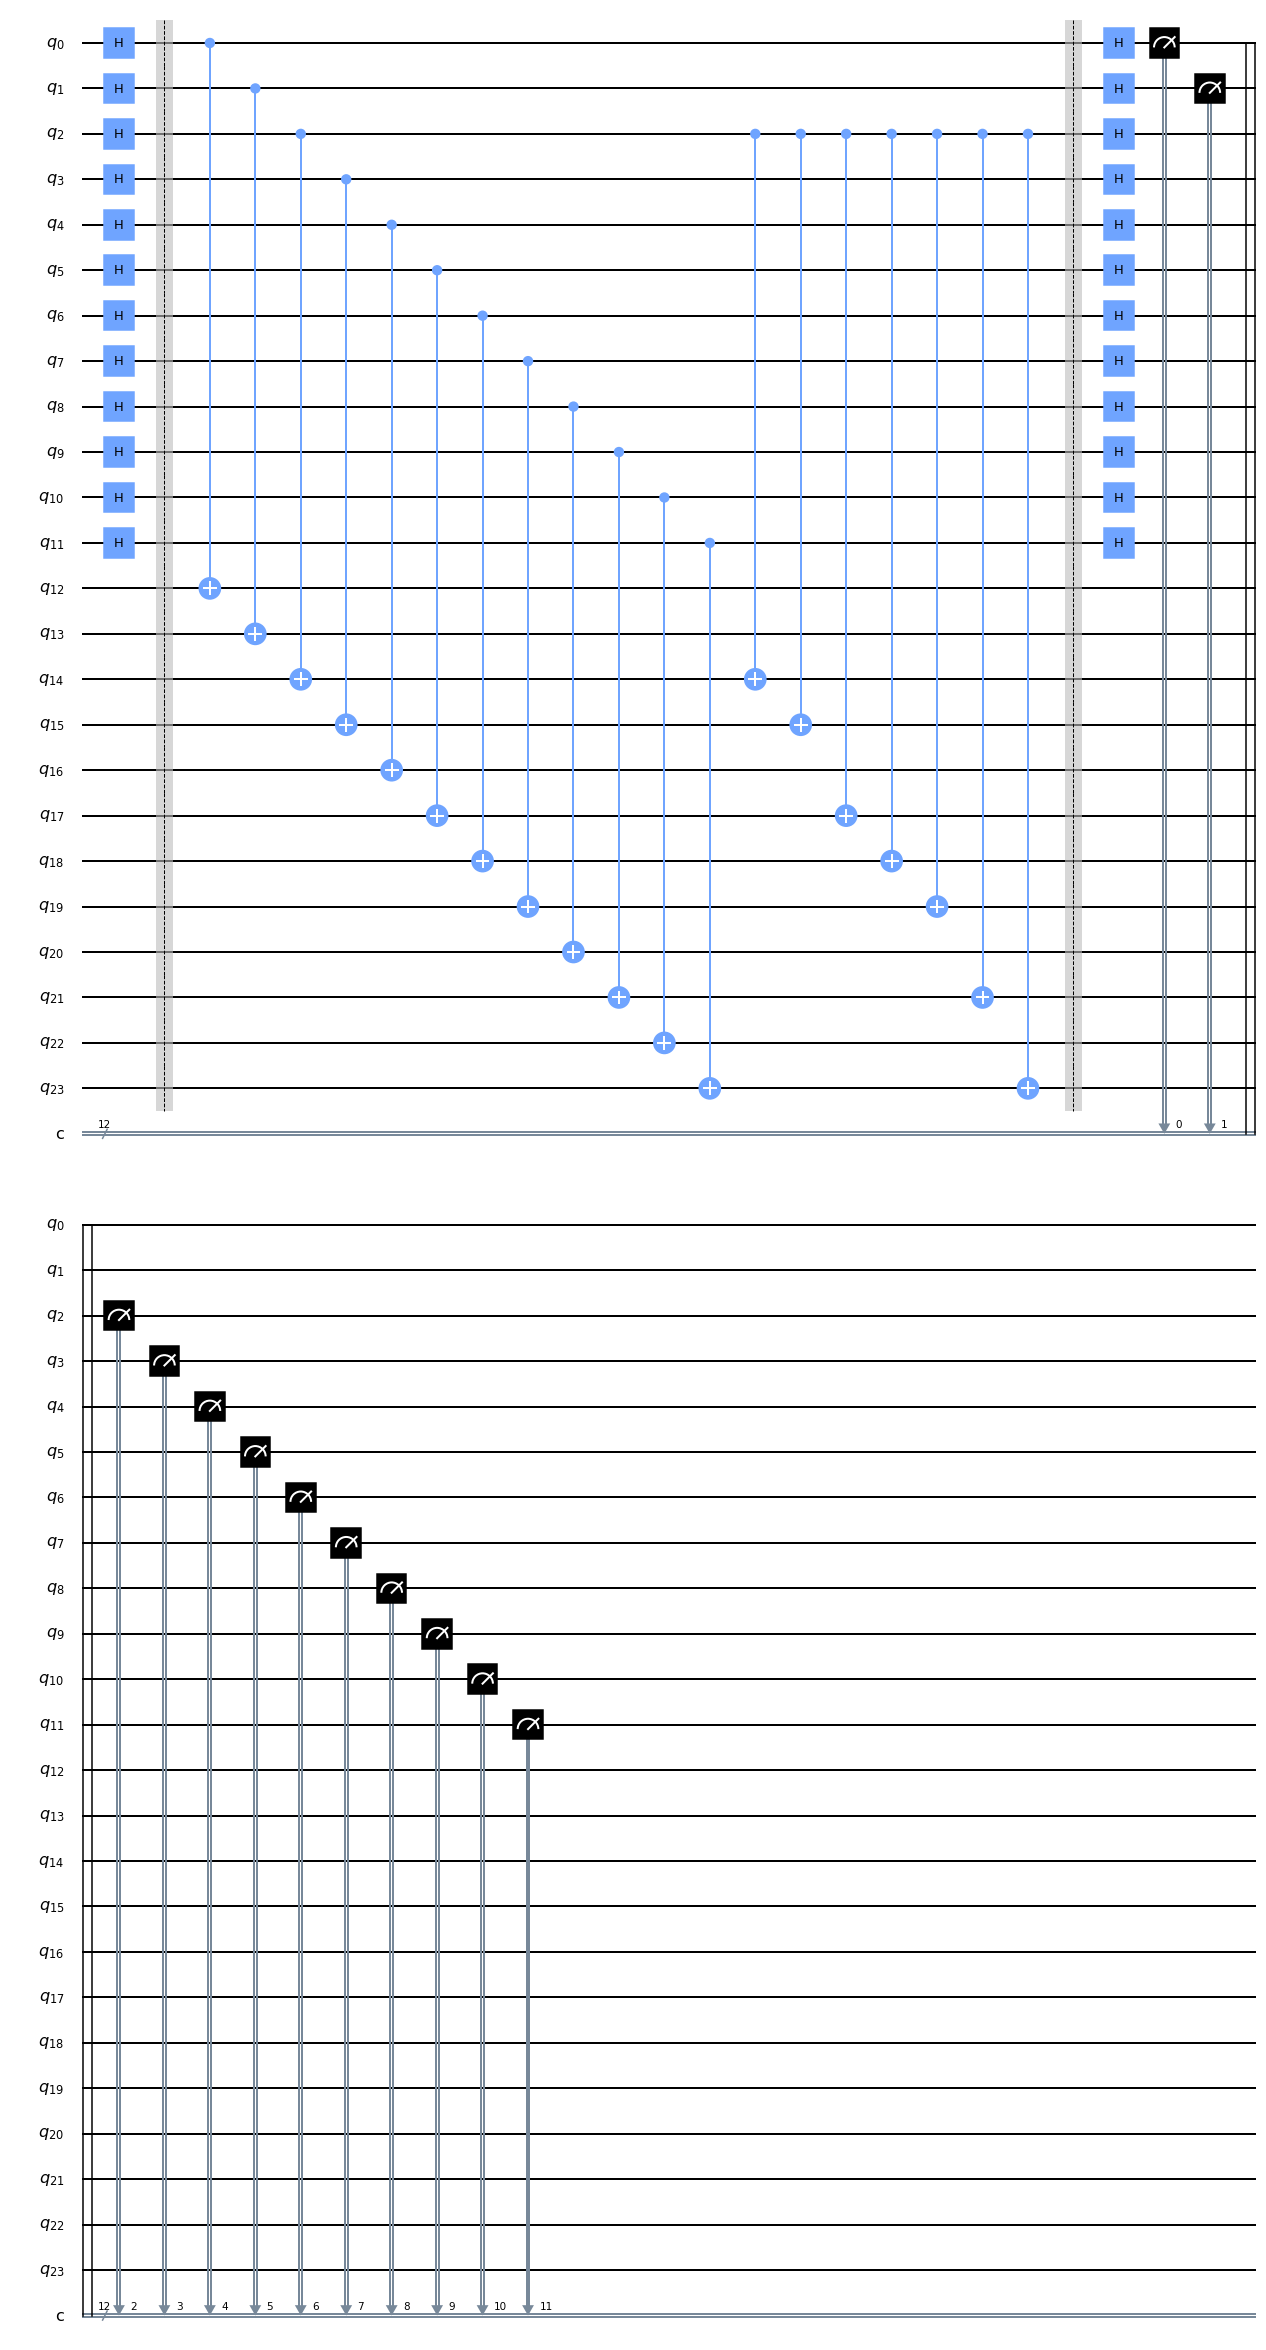

In [24]:
#b = '01101' #for 5q
b='101011101100' #for 12q
#b='101011'#for 6q
#b= '10100'
#b='000000'
n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

In [25]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(simon_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [26]:
z1=[]
z2=[]
for z in counts:
    h=0
    for i in z:
        if i=='1':
            h=h+1
    if h==1:
        z1.append(z)
    if h==2:
        z2.append(z)

xxx=numpy.empty((2,n),dtype=str)

for z in z1:
    for on in range(n):
        if z[on]=='1':
            xxx[0][on]='z'

for z in z2:
    for i in range(n):
        for j in range(n):
            if z[i]=='1':
                if z[j]=='1': 
                    if i!=j:
                        for ig in range(2):
                            if xxx[ig][i]=='z':
                                xxx[ig][j]='z'
                            if xxx[ig][i]=='o':
                                xxx[ig][j]='o'
                        if xxx[0][i]=='':
                            if xxx[0][j]=='': 
                                    xxx[0][j]='o'
                                    xxx[0][i]='o'    
                                    xxx[1][:]=xxx[0][:]
                                    xxx[1][j]='z'
                                    xxx[1][i]='z'
bit=numpy.zeros((2,n),dtype=int)
zeros=numpy.zeros(n)
for h in range(n):
    for g in range(2):
        if xxx[g][h]=='z':
            bit[g][h]=0
        else:
                bit[g][h]=1
print(bit[0],'- is period for f')
#' and ',bit[1] ,

[1 0 1 0 1 1 1 0 1 1 0 0] - is period for f


In [27]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)
f=0
for z in counts:
    f=f+1
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

101011101100.011101110100 = 0 (mod 2)
101011101100.111100011101 = 0 (mod 2)
101011101100.111101111101 = 0 (mod 2)
101011101100.110001110111 = 0 (mod 2)
101011101100.011100110011 = 0 (mod 2)
101011101100.110001001100 = 0 (mod 2)
101011101100.101001011001 = 0 (mod 2)
101011101100.101010010110 = 0 (mod 2)
101011101100.100010010010 = 0 (mod 2)
101011101100.010101000101 = 0 (mod 2)
101011101100.010000101001 = 0 (mod 2)
101011101100.001011100000 = 0 (mod 2)
101011101100.100101110110 = 0 (mod 2)
101011101100.111001001010 = 0 (mod 2)
101011101100.001000100001 = 0 (mod 2)
101011101100.101010101110 = 0 (mod 2)
101011101100.111101000111 = 0 (mod 2)
101011101100.110001011100 = 0 (mod 2)
101011101100.110000010100 = 0 (mod 2)
101011101100.111100101011 = 0 (mod 2)
101011101100.100000011000 = 0 (mod 2)
101011101100.000010100011 = 0 (mod 2)
101011101100.100011100000 = 0 (mod 2)
101011101100.010001010111 = 0 (mod 2)
101011101100.110010100100 = 0 (mod 2)
101011101100.001011010110 = 0 (mod 2)
101011101100

In [ ]:
def simon_oracle(b):
    """returns a Simon oracle for bitstring b"""
    b = b[::-1] # reverse b for easy iteration
    n = len(b)
    qc = QuantumCircuit(n*2)
    # Do copy; |x>|0> -> |x>|x>
    for q in range(n):
        qc.cx(q, q+n)
    if '1' not in b: 
        return qc  # 1:1 mapping, so just exit
    i = b.find('1') # index of first non-zero bit in b
    # Do |x> -> |s.x> on condition that q_i is 1
    for q in range(n):
        if b[q] == '1':
            qc.cx(i, (q)+n)
    return qc 